# Rating & Ranking 2023 WIAC Women's CBB
and predicting the conference tournament

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup

In [2]:
#get teams

url = "https://www.ncaa.com/scoreboard/basketball-women/d3/2023/02/15/wiac"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

if (page.status_code == 200):
    ts = soup.find_all("span", class_="gamePod-game-team-name")

teams = [None]*len(ts)  #empty array of teams

print(f"Found {len(teams)} teams.")

for i in range(0,len(teams)):
    teams[i] = ts[i].text

print(teams)

Found 8 teams.
['Wis.-La Crosse', 'UW-River Falls', 'Wis.-Stevens Point', 'Wis.-Oshkosh', 'Wis.-Whitewater', 'Wis.-Platteville', 'Wis.-Eau Claire', 'Wis.-Stout']


In [3]:
#loop over season dates and extract games


years = [2022,2022,2023,2023]#,2023]
months = ["11", "12", "01", "02"]#, "03"]
days = np.arange(1,32)


#initialize and create empty numpy tournament matrix
tmat = np.zeros((len(teams),len(teams)))
gamectr = 0
games = []

for j in range(0,len(months)):
    for day in days:
        if day < 10:
            url = f"https://www.ncaa.com/scoreboard/basketball-women/d3/{years[j]}/{months[j]}/0{day}/wiac"
        else:
            url = f"https://www.ncaa.com/scoreboard/basketball-women/d3/{years[j]}/{months[j]}/{day}/wiac"
        page = requests.get(url)
        if (page.status_code == 200):
            soup = BeautifulSoup(page.content, "html.parser")
                       
            names = soup.find_all("span", class_="gamePod-game-team-name")
            scores = soup.find_all("span", class_="gamePod-game-team-score")
            
            N = int(len(names)/2) #number of games
            
            for i in range(0,int(len(names)/2)):
                if ((names[2*i].text in teams) and (names[2*i+1].text in teams)):  #make sure both teams are in WIAC
                    #print(f"{names[2*i].text} is in teams and so is {names[2*i+1].text}")
                    #gamectr += 1
                    if not((scores[2*i].text == "") or (scores[2*i].text == "")): #make sure both teams have a score, ie game played
                        gamectr += 1
                        games.append([names[2*i].text,names[2*i+1].text,scores[2*i].text,scores[2*i+1].text,years[j],months[j],day])
                        if (int(scores[2*i].text) > int(scores[2*i+1].text)):  #away team win
                            tmat[teams.index(names[2*i].text), teams.index(names[2*i+1].text)]+=1 
                            #print(f"{names[2*i].text} beat {names[2*i+1].text} by a score of {scores[2*i].text} to {scores[2*i+1].text} on {months[j]}/{day}")
                        if (int(scores[2*i+1].text) > int(scores[2*i].text)):  #home team win
                            tmat[teams.index(names[2*i+1].text), teams.index(names[2*i].text)]+=1
                            #print(f"{names[2*i+1].text} beat {names[2*i].text} by a score of {scores[2*i+1].text} to {scores[2*i].text} on {months[j]}/{day}")
                        if (int(scores[2*i].text) == int(scores[2*i+1].text)):   #draw
                            tmat[teams.index(names[2*i+1].text), teams.index(names[2*i].text)]+=0.5
                            tmat[teams.index(names[2*i].text), teams.index(names[2*i+1].text)]+=0.5
                    #else:
                        #print(f"Game between {names[2*i].text} and {names[2*i+1].text} on {months[j]}/{day}  has missing score(s)")
                #else:
                    #print(f"Game between {names[2*i].text} and {names[2*i+1].text} on {months[j]}/{day} is missing teams index")
            
            
print("")
print(f"Processed {gamectr} games!")
print("")


Processed 56 games!



In [4]:
print(games)

[['Wis.-Platteville', 'Wis.-Oshkosh', '60', '35', 2022, '11', 30], ['UW-River Falls', 'Wis.-Eau Claire', '71', '74', 2022, '11', 30], ['Wis.-Whitewater', 'Wis.-La Crosse', '58', '53', 2022, '11', 30], ['Wis.-Stout', 'Wis.-Stevens Point', '64', '58', 2022, '11', 30], ['Wis.-Oshkosh', 'Wis.-Stout', '58', '66', 2022, '12', 3], ['UW-River Falls', 'Wis.-Whitewater', '67', '64', 2022, '12', 3], ['Wis.-Platteville', 'Wis.-Stevens Point', '53', '59', 2022, '12', 3], ['Wis.-La Crosse', 'Wis.-Eau Claire', '56', '68', 2022, '12', 3], ['Wis.-Stout', 'UW-River Falls', '74', '59', 2023, '01', 4], ['Wis.-Eau Claire', 'Wis.-Oshkosh', '62', '53', 2023, '01', 4], ['Wis.-La Crosse', 'Wis.-Platteville', '70', '55', 2023, '01', 4], ['Wis.-Stevens Point', 'Wis.-Whitewater', '52', '55', 2023, '01', 4], ['Wis.-Oshkosh', 'UW-River Falls', '64', '53', 2023, '01', 7], ['Wis.-Platteville', 'Wis.-Stout', '61', '72', 2023, '01', 7], ['Wis.-Stevens Point', 'Wis.-La Crosse', '45', '47', 2023, '01', 7], ['Wis.-Whitewa

In [5]:
print(tmat)

[[0. 2. 2. 1. 0. 2. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 2. 0. 0.]
 [1. 2. 2. 0. 0. 1. 1. 1.]
 [2. 1. 2. 2. 0. 0. 2. 1.]
 [0. 1. 0. 1. 2. 0. 0. 0.]
 [2. 1. 2. 1. 0. 2. 0. 1.]
 [1. 2. 2. 1. 1. 2. 1. 0.]]


### Tournament matrix analysis

In [7]:
wiacwins = np.zeros(8)
for i in range(0,8):
    wiacwins[i] = tmat[i,:].sum()
    
print("Team: Wins")
for i in range(0,8):
    print(f"{teams[i]}: {wiacwins[i]}")

Team: Wins
Wis.-La Crosse: 8.0
UW-River Falls: 4.0
Wis.-Stevens Point: 3.0
Wis.-Oshkosh: 8.0
Wis.-Whitewater: 10.0
Wis.-Platteville: 4.0
Wis.-Eau Claire: 9.0
Wis.-Stout: 10.0


In [8]:
t2 = np.dot(tmat,tmat)

print(t2)

wiac2wins = np.zeros(8)
for i in range(0,8):
    wiac2wins[i] = t2[i,:].sum()
    
print("Team: Second Order Wins")
for i in range(0,8):
    print(f"{teams[i]}: {wiac2wins[i]}")

[[ 2.  8.  6.  3.  7.  9.  4.  1.]
 [ 4.  4.  4.  4.  2.  4.  2.  2.]
 [ 0.  2.  1.  2.  5.  1.  1.  0.]
 [ 3.  8.  8.  4.  5. 12.  3.  2.]
 [ 7. 14. 15.  5.  2. 17.  4.  6.]
 [ 5.  4.  7.  4.  1.  2.  6.  3.]
 [ 2. 12.  9.  5.  6. 12.  3.  3.]
 [ 5. 10. 10.  6.  6. 11.  5.  4.]]
Team: Second Order Wins
Wis.-La Crosse: 40.0
UW-River Falls: 26.0
Wis.-Stevens Point: 12.0
Wis.-Oshkosh: 45.0
Wis.-Whitewater: 70.0
Wis.-Platteville: 32.0
Wis.-Eau Claire: 52.0
Wis.-Stout: 57.0


### Spectral rating


In [10]:
wiacL = np.copy(tmat)

for j in range(0,8):
    wiacL[:,j] = wiacL[:,j]/wiacL[:,j].sum()

v,w = np.linalg.eig(wiacL)


wiacspecrat = np.real(w[:,0]/max(w[:,0]))

print("Team: Spectral Rating")
for i in range(0,8):
    print("{}: {:5.1f}".format(teams[i],wiacspecrat[i]))

Team: Spectral Rating
Wis.-La Crosse:   0.6
UW-River Falls:   0.5
Wis.-Stevens Point:   0.2
Wis.-Oshkosh:   0.7
Wis.-Whitewater:   1.0
Wis.-Platteville:   0.7
Wis.-Eau Claire:   0.7
Wis.-Stout:   0.9


### Elo rating


In [12]:
numgames = len(games)
scale = 400
K = 30

elo = [1000,1000,1000,1000,1000,1000,1000,1000]

for i in range(numgames-1,0,-1):
    hteam = games[i][1]
    ateam = games[i][0]
    hscore = games[i][3]
    ascore = games[i][2]
    
    #get ratings
    hrat = elo[teams.index(hteam)]
    arat = elo[teams.index(ateam)]
    diff = hrat - arat
    
    #calc expected results/probs of winning
    hexp = 1./(1. + 10**(diff/scale))
    aexp = 1. - hexp
    
    #update ratings
    if (hscore > ascore): #home team win
        elo[teams.index(hteam)] += K*(1. - hexp)
        elo[teams.index(ateam)] += K*(0. - aexp)
    elif (ascore > hscore): #away team win
        elo[teams.index(hteam)] += K*(0. - hexp)
        elo[teams.index(ateam)] += K*(1. - aexp)
    #no else or draws needed
    
    #[print(name,elo[names.index(name)]) for name in names ]
[print(name,elo[teams.index(name)]) for name in teams ];

Wis.-La Crosse 1051.9472395876528
UW-River Falls 871.8910603571981
Wis.-Stevens Point 825.556990780845
Wis.-Oshkosh 1060.9810821669041
Wis.-Whitewater 1122.4058855186036
Wis.-Platteville 884.6999690640331
Wis.-Eau Claire 1059.7165354939345
Wis.-Stout 1122.8012370308286


### Colley


In [15]:
Cmat = np.zeros((8,8))
bvec = np.zeros((8,1))

for i in range(0,8):
    Cmat[i,i] = 2.
    bvec[i] = 1.
    

numgames = len(games)

for i in range(0,numgames,1):
    hteam = games[i][1]
    ateam = games[i][0]
    hscore = games[i][3]
    ascore = games[i][2]
    hidx = teams.index(hteam)
    aidx = teams.index(ateam)
    
    Cmat[hidx,hidx] += 1.  #add 1 to total games played by home team
    Cmat[aidx,aidx] += 1.
    
    Cmat[hidx,aidx] += -1. #add -1 to offdiagonal entry corresponding to opponent
    Cmat[aidx,hidx] += -1.
    
    if (hscore > ascore): #home team win
        bvec[hidx] += 1./2.
        bvec[aidx] += -1/2.
    elif (ascore > hscore): #away team win
        bvec[aidx] += 1./2.
        bvec[hidx] += -1/2.

Crating = np.linalg.solve(Cmat,bvec)



#print(Cmat)
#print(bvec)

print('Team:  Colley rating')
for i in range(0,8):
    print(f"{teams[i]}: {Crating[i][0]:4.2f}")


Team:  Colley rating
Wis.-La Crosse: 0.56
UW-River Falls: 0.33
Wis.-Stevens Point: 0.28
Wis.-Oshkosh: 0.56
Wis.-Whitewater: 0.67
Wis.-Platteville: 0.33
Wis.-Eau Claire: 0.61
Wis.-Stout: 0.67


### Massey

In [22]:
numgames = len(games)
numteams = len(teams)
AN = np.zeros((numgames,numteams))
BN = np.zeros((numgames,1))

#build matrix and RHS vector
for i in range(0,numgames,1):
    hteam = games[i][1]
    ateam = games[i][0]
    hscore = int(games[i][3])
    ascore = int(games[i][2])
    hidx = teams.index(hteam)
    aidx = teams.index(ateam)
    
    if hscore>ascore:
        AN[i,hidx] = 1.
        AN[i,aidx] = -1.
        BN[i] = hscore-ascore
    elif ascore>hscore:
        AN[i,hidx] = -1.
        AN[i,aidx] = 1.
        BN[i] = ascore-hscore

MAT = np.dot(np.transpose(AN),AN)
BT = np.dot(np.transpose(AN),BN)
MAT[-1] = np.ones(numteams)
BT[-1] = 0.

r = np.linalg.solve(MAT,BT)

print('Team:  Massey rating')
for i in range(0,numteams):
    print(f"{teams[i]}: {r[i][0]:4.2f}")



Team:  Massey rating
Wis.-La Crosse: 4.25
UW-River Falls: -5.19
Wis.-Stevens Point: -7.94
Wis.-Oshkosh: 0.81
Wis.-Whitewater: 5.63
Wis.-Platteville: -3.19
Wis.-Eau Claire: 1.75
Wis.-Stout: 3.88


### Draw graph using networkx?


In [23]:
import networkx as nx

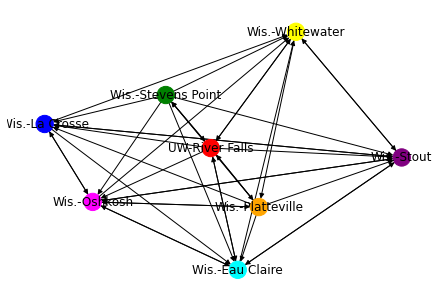

In [75]:
Adj = np.copy(tmat)
ecol = ['black','red']
G = nx.DiGraph(edge_attr=['color']) 
for i in range(0,len(Adj)): 
    for j in range(0,len(Adj)): 
        if Adj[i][j] == 1: 
            G.add_edge(j,i,weight=1)
        if Adj[i][j] == 2: 
            G.add_edge(j,i,weight=2)
            
labeldict = {}
colors = ['red','blue','green','magenta','orange','purple','yellow','cyan']

nodecolors = []
for i in range(numteams):
    labeldict[i] = teams[i]
    nodecolors.append(colors[i%8])

#nx.draw_networkx( G,labels=labeldict, with_labels=True, node_color=nodecolors,pos=nx.shell_layout(G) ) 
nx.draw( G,labels=labeldict, with_labels=True, node_color=nodecolors,pos=nx.spring_layout(G) ) 
#nx.draw( G,labels=labeldict, with_labels=True, node_color=nodecolors, pos=nx.fruchterman_reingold_layout(G) )
#nx.draw( G,labels=labeldict, with_labels=True, node_color=nodecolors,pos=nx.spiral_layout(G) ) 

#nx.draw( G,labels=labeldict, with_labels=True, node_color=nodecolors,pos=nx.circular_layout(G)) 

plt.show() 

In [31]:
print(Adj)

[[0. 2. 2. 1. 0. 2. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 2. 0. 0.]
 [1. 2. 2. 0. 0. 1. 1. 1.]
 [2. 1. 2. 2. 0. 0. 2. 1.]
 [0. 1. 0. 1. 2. 0. 0. 0.]
 [2. 1. 2. 1. 0. 2. 0. 1.]
 [1. 2. 2. 1. 1. 2. 1. 0.]]


In [51]:
print(nodecolors)

[(0.25, 0.42857142857142855, 0.5), (0.25, 0.7142857142857143, 0.5), (0.25, 0.7857142857142857, 0.5), (0.25, 0.42857142857142855, 0.5), (0.25, 0.2857142857142857, 0.5), (0.25, 0.7142857142857143, 0.5), (0.25, 0.35714285714285715, 0.5), (0.25, 0.2857142857142857, 0.5)]
